# Reduce data 

In [1]:
%matplotlib widget
import numpy as np
import json, os, glob, numbers
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *
from alvra_tools.XAS_utils import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
pgroup = 'p22588'

runlist = [125, 126]

jsonlist, runlist,_ = initialize(pgroup, runlist)

will reduce 2 run(s): [125, 126]
Run name(s): ['run0125-PtLQ_600nm_FluenceScan_1ps_2469', 'run0126-PtLQ_600nm_FluenceScan_1ps_2469']


In [3]:
channel_delay_motor = channel_delay_beckhoff

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero122

dir2save = ''

TT = None
saveflag = True

###########################################################
reducedir='/sf/alvra/data/{}/work/Test/{}'.format(pgroup, dir2save)

results_reduced = Reduce_scan_PP(reducedir, saveflag, jsonlist, TT, channel_delay_motor, 
                                 detector_XAS_1, detector_XAS_2, detector_Izero, tolerance=0.00001)

/sf/alvra/data/p22588/raw/run0126-PtLQ_600nm_FluenceScan_1ps_2469/meta/scan.json
Step 13 of 13: Processing acq0013

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet          1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-CVME-EVR0:DUMMY_PV3_NBS  1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH1_VAL_GET     1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:PR1_CH2_VAL_GET     1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY         997 / 1003 -> 1% loss ▇▇▇▇▇▇▇▇▇
SLAAR11-L-BECKBS:PR1_CH4_VAL_GET 1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 995 / 1003 -> 1% loss
complete channels: 0 / 6 -> 100% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1:1
Loaded 492 pump and 492 unpump shots
correlation Diode1 (dark shots) = 0.9935485021814056
correlation Diode2 (dark shots) = 0.997533465451

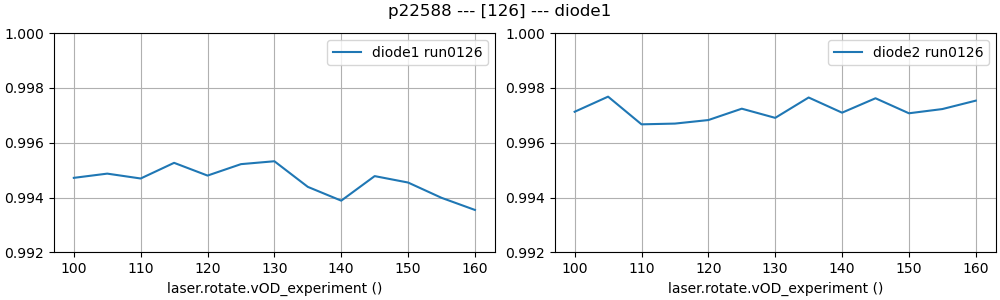

In [6]:
Plot_correlations_scan(pgroup, reducedir, run=runlist[1], path='raw', timescan=False, lowlim = 0.992)

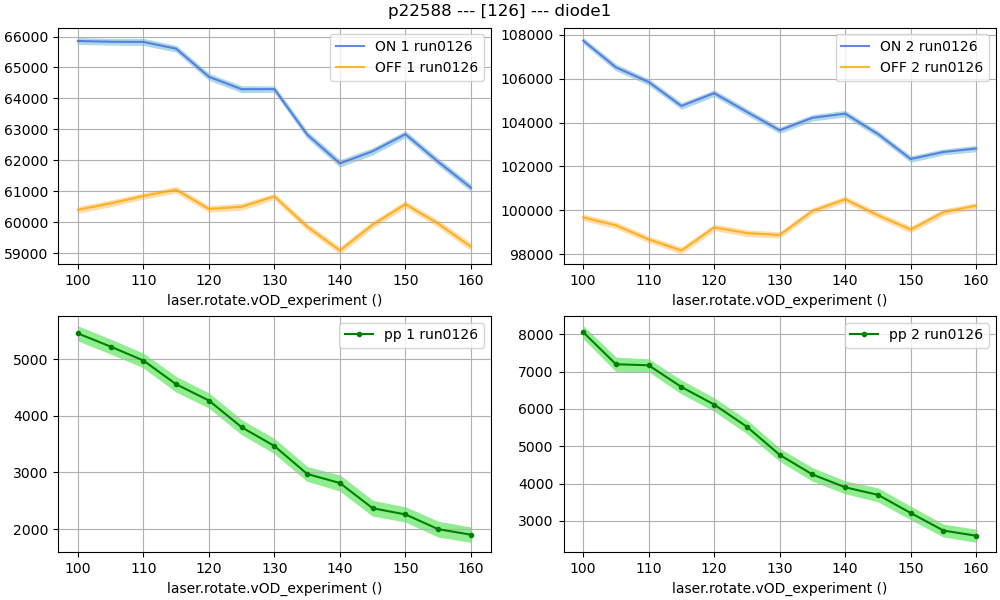

In [7]:
Plot_scan_2diodes(pgroup, reducedir, run=runlist[1], threshold=0, path='raw', timescan=False)

In [7]:
GS = unpump_1_raw
GS = unpump_1_raw#/np.nanmean(np.array(unpump_1_raw))

ordered = np.argsort(np.asarray(scanvar))
peaks, what = find_peaks(np.diff(np.array(scanvar)[ordered]))

Izero_unpump = np.array(Izero_unpump)[ordered]

starts = np.append(0, peaks)
ends = np.append(peaks, None)

I0u = []
G = []

for s, e in zip(starts, ends):
    Izero = Izero_unpump[s:e]
    GSs = GS[s:e]
    I0u.append(np.mean(Izero))
    G.append(np.mean(GSs))

plt.figure(figsize=(7,5))
#plt.suptitle(titlestring_stack+' -- 1 diode')
#plt.scatter (energy, Izero_pump, label='Izero - off', s=0.5)
plt.scatter(readbacks, I0u, label='Izero - off')
#plt.scatter(readbacks, np.array(G), label='GS')
#plt.scatter(readbacks, np.array(G)/np.array(I0u), label='GS norm')
plt.legend(loc='best')
plt.show()

NameError: name 'scanvar' is not defined

In [ ]:
GS = unpump_1

ordered = np.argsort(np.asarray(energypad))
peaks, what = find_peaks(np.diff(np.array(energypad)[ordered]))

Izero_unpump = np.array(Izero_unpump)[ordered]

starts = np.append(0, peaks)
ends = np.append(peaks, None)

I0u = []
G = []

for s, e in zip(starts, ends):
    Izero_p = Izero_pump[s:e]
    GSs = GS[s:e]
    I0u.append(np.mean(Izero_p))
    G.append(np.mean(GSs))

plt.figure(figsize=(7,5))
#plt.suptitle(titlestring_stack+' -- 1 diode')
#plt.scatter (energy, Izero_pump, label='Izero - off', s=0.5)
plt.scatter(readbacks, I0u, label='Izero - off')
plt.scatter(readbacks, np.array(G)/np.array(I0u), label='GS')
plt.scatter(readbacks, np.array(G)/np.array(I0u), label='GS norm')
plt.legend(loc='best')
plt.show()